# Recurrent Neural Networks Sentiment Analysis
https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/

1. convert text to vectors

    a) Integer encoding 
    
    b) embeddings


1. ANN works for fixed input size (tabular data)
2. CNN (images, videos)
3. RNN - specifically used for sequential taks. majorly used in NLP tasks

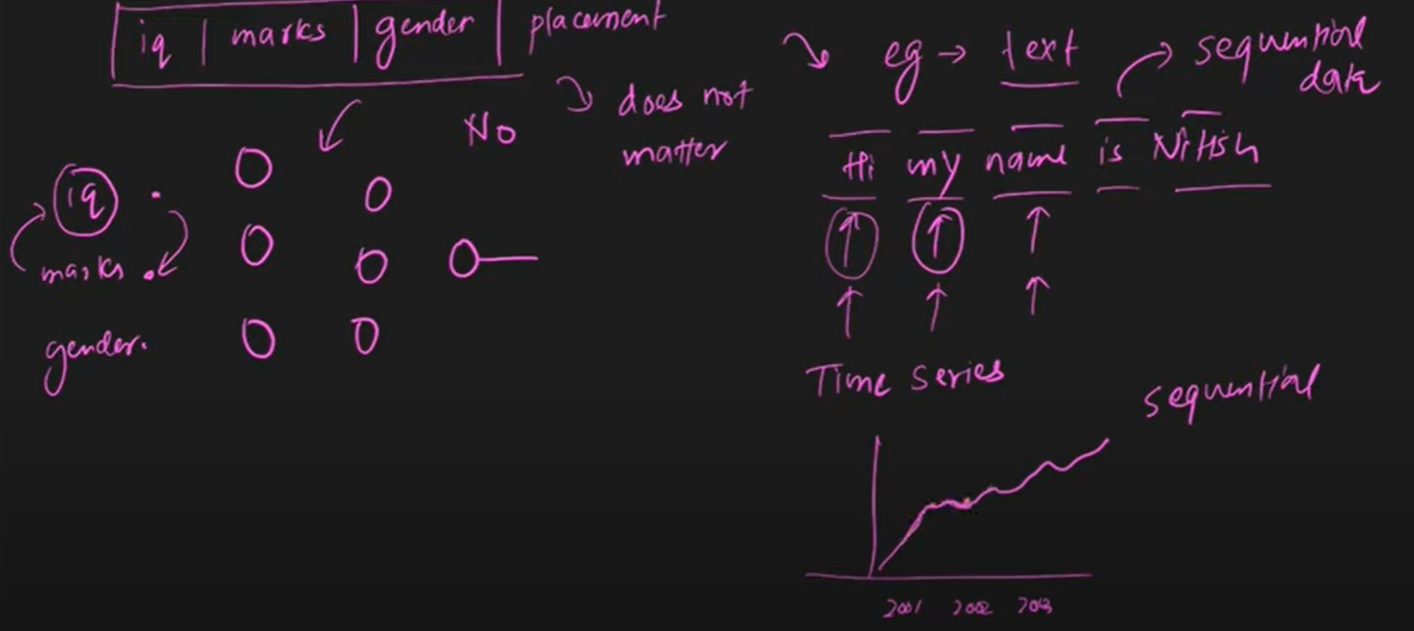

In [1]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
model=Sequential()
# nodes= 3, timestamp= 4, input_features= 5 (len of every word)
model.add(SimpleRNN(3, input_shape=(4,5)))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 27        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [3]:
# wi
model.get_weights()[0].shape

(5, 3)

In [4]:
model.get_weights()[0]

array([[-0.4345526 , -0.5428885 ,  0.13938862],
       [-0.15452749,  0.16207689,  0.11629277],
       [-0.53600466, -0.45286933, -0.29930532],
       [ 0.529699  , -0.855823  , -0.39367706],
       [ 0.39275557, -0.8505434 , -0.42466444]], dtype=float32)

In [12]:
# wh
model.get_weights()[1].shape

(3, 3)

In [6]:
model.get_weights()[1]

array([[ 0.722695  ,  0.3194924 , -0.61289203],
       [ 0.415873  ,  0.5072621 ,  0.7548079 ],
       [-0.5520522 ,  0.8003811 , -0.23372738]], dtype=float32)

In [13]:
# b1
model.get_weights()[2].shape

(3,)

In [9]:
model.get_weights()[2]

array([0., 0., 0.], dtype=float32)

In [8]:
# bias for hidden nodes
model.get_weights()[3].shape

(3, 1)

In [10]:
model.get_weights()[3]

array([[ 1.1610252],
       [-0.6244505],
       [ 1.2205638]], dtype=float32)

In [14]:
model.get_weights()[4].shape

(1,)

In [ ]:
model.get_weights()[4]

In [ ]:
# model.get_weights()[5]

## sentiment analysis using RNN (keras)

In [15]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN
from keras.utils import pad_sequences

In [16]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

In [17]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [19]:
# len(X_train[2])
len(X_train[1])

189

In [20]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [8]:
# len(X_train[2])
len(X_train[1])

50

In [21]:
model = Sequential()
model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 [==============================] - 14s 16ms/step - loss: 0.6958 - accuracy: 0.5027 - val_loss: 0.6942 - val_accuracy: 0.5040
Epoch 2/5
782/782 [==============================] - 13s 16ms/step - loss: 0.6935 - accuracy: 0.4975 - val_loss: 0.6948 - val_accuracy: 0.5022
Epoch 3/5
782/782 [==============================] - 13s 17ms/step - loss: 0.6924 - accuracy: 0.5109 - val_loss: 0.6933 - val_accuracy: 0.5086
Epoch 4/5
782/782 [==============================] - 13s 16ms/step - loss: 0.6929 - accuracy: 0.5050 - val_loss: 0.6938 - val_accuracy: 0.5020
Epoch 5/5
782/782 [==============================] - 13s 16ms/step - loss: 0.6927 - accuracy: 0.5090 - val_loss: 0.6950 - val_accuracy: 0.5031
